In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('data/adult19.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31997 entries, 0 to 31996
Columns: 534 entries, URBRRL to POVRATTC_A
dtypes: float64(369), int64(164), object(1)
memory usage: 130.4+ MB


In [4]:
# those that feel depressed at least on a weekly basis
df_depressed = df[df.DEPFREQ_A <= 2].copy()

In [5]:
df_depressed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 4 to 31990
Columns: 534 entries, URBRRL to POVRATTC_A
dtypes: float64(369), int64(164), object(1)
memory usage: 12.7+ MB


Introduction: Here, you want to talk about the subject matter domain, an overall take on what makes the topic interesting, and your research questions.

Hypotheses: Given your general research questions, which are based on some interesting observation or outside trend, the next step is to formally state which hypotheses you want to test.

Data: Now that you have walked through the relevance of the topic, posed your research questions, and framed testable hypotheses based on those questions, it's time to introduce the dataset. Tell your audience about the data—when and where was it collected? Perhaps include descriptive statistics or measures of distribution.

Methods: Explain the steps needed to test the hypotheses. This includes any data wrangling, tests, and visualizations that you will need to definitively reject or fail to reject your null hypotheses.

Results: Now, you can walk through the results of the methods. State the results of your tests and explain whether these results mean that you reject or fail to reject the null. Also include compelling tables or graphs to illustrate your findings.

Discussion and recommendations: What insights can interested parties get from this research? What would you recommend for further research?

In [6]:
depressed_vars = pd.read_csv('dep_vars.csv')

In [7]:
depressed_core = df_depressed[depressed_vars.Variable].copy()

In [8]:
depressed_core.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 4 to 31990
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DEPEV_A     3118 non-null   int64  
 1   DEPFREQ_A   3118 non-null   int64  
 2   DEPMED_A    3118 non-null   int64  
 3   DEPLEVEL_A  3118 non-null   float64
 4   PHQ81_A     3118 non-null   int64  
 5   PHQ82_A     3118 non-null   int64  
 6   PHQ83_A     3118 non-null   int64  
 7   PHQ84_A     3118 non-null   int64  
 8   PHQ85_A     3118 non-null   int64  
 9   PHQ86_A     3118 non-null   int64  
 10  PHQ87_A     3118 non-null   int64  
 11  PHQ88_A     3118 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 316.7 KB


In [9]:
depressed_core.columns

Index(['DEPEV_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'PHQ81_A', 'PHQ82_A',
       'PHQ83_A', 'PHQ84_A', 'PHQ85_A', 'PHQ86_A', 'PHQ87_A', 'PHQ88_A'],
      dtype='object')

According to the codebook, DEPEV_A is the response to the question: "Have you ever been told by a doctor or health professional that you had ...any type of depression?" The values DEPEV_A can take are: 1, yes; 2, no, 7, refused; 8, not ascertained; and 9 , don't know.  Labeling the values and then creating a countplot...  

<AxesSubplot:xlabel='DEPEV_A', ylabel='count'>

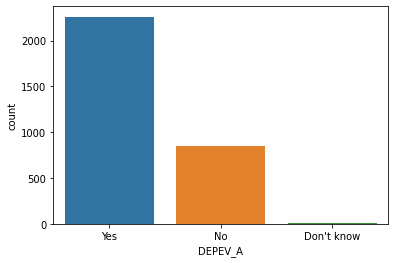

In [10]:
labels = {1:'Yes', 2: 'No', 7: 'Refused', 8: 'Not ascertained', 9: "Don't know"}
depressed_core.DEPEV_A.replace(labels, inplace=True)
sns.countplot(x = 'DEPEV_A', data = depressed_core)

The majority have been diagnosed as depressed although over 500 have not been told by a doctor they have depression.  


DEPFREQ_A is the response to the question "How often do you feel depressed?" The values DEPFREQ_A can take are: 1, daily; 2, weekly; 3, monthly; 4, a few times a year; 5 never; 7, refused; 8, not ascertained; 9, don't know.  Earlier I filtered the dataframe to only include values of 1 or 2.  Renaming the labels and creating a countplot... 

<AxesSubplot:xlabel='DEPFREQ_A', ylabel='count'>

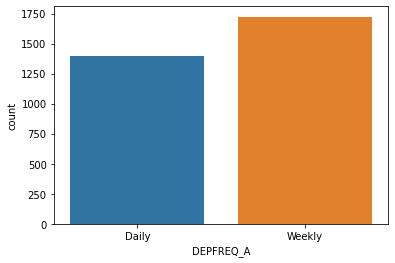

In [11]:
labels = {1:'Daily',2:'Weekly'}
depressed_core.DEPFREQ_A.replace(labels,inplace=True)
sns.countplot(x='DEPFREQ_A', data=depressed_core)

As you can see more feel depression on a weekly basis but it close to even.

DEPMED_A represents respondants to the question, "Do you take prescription medication for depression?"  The values are: 1, yes; 2, no; 7, refused; 8, not ascertained; and 9, don't know.

<AxesSubplot:xlabel='DEPMED_A', ylabel='count'>

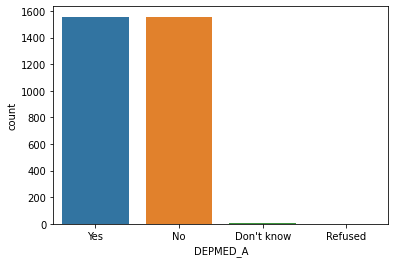

In [12]:
labels = {1:'Yes',2:'No',7:'Refused',8:'Not ascertained',9:"Don't know"}
depressed_core.DEPMED_A.replace(labels,inplace=True)
sns.countplot(x='DEPMED_A',data=depressed_core)

An equal amount of those feeling depression take and do not take medication for depression.  

DEPLEVEL_A is the respondants answer to the question, "Thinking about the last time you felt depressed, how depressed did you feel?  Would you say a little, a lot, or somewhere in between?".  Values represented: 1, a little; 2, a lot; 3, somewhere in between a little and a lot; 7, refused; 8, not ascertained; 9, don't know. 

<AxesSubplot:xlabel='DEPLEVEL_A', ylabel='count'>

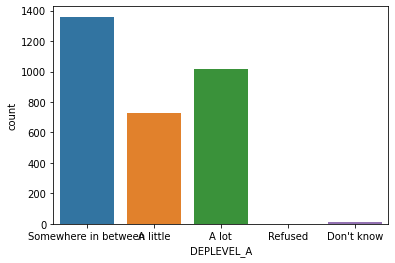

In [13]:
labels = {1: 'A little', 2: 'A lot', 3: 'Somewhere in between', 7: 'Refused', 8: 'Not ascertained', 9: "Don't know"}
depressed_core.DEPLEVEL_A.replace(labels, inplace=True)
sns.countplot(x = 'DEPLEVEL_A', data = depressed_core)

The majority feel somewhere in between a little and a lot. 

PHQ81_A holds responses from the question, "Over the last two weeks how often have you been bothered by little interest or pleasure in doing things?" Responses include: 1, not at all; 2, several days; 3, more than half the days; 4, nearly every day; 7, refused; 8, not ascertained; 9, don't know.

<AxesSubplot:xlabel='PHQ81_A', ylabel='count'>

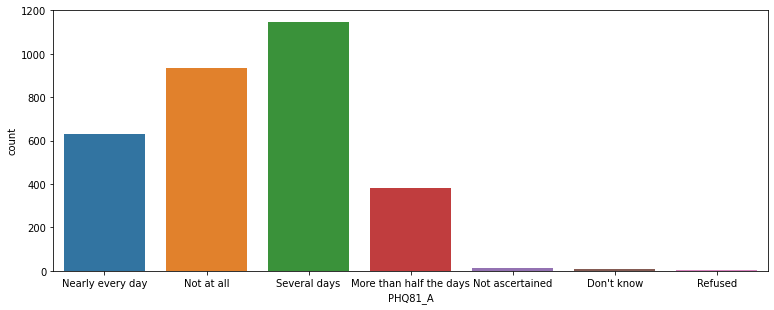

In [14]:
labels = {1: 'Not at all', 2: 'Several days', 3: 'More than half the days', 4: 'Nearly every day', 7: 'Refused', 
          8: 'Not ascertained', 9: "Don't know"}
depressed_core.PHQ81_A.replace(labels, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ81_A', data=depressed_core)

The majority of those facing depression feels bothered by little interest or pleasure several days.  

PHQ82_A holds the answer to: in the past two weeks, how often have you been bothered by feeling down, depressed or hopeless?
The data can take on values: 1, not at all; 2, several days; 3, more than half the days; 4, nearly every day; 7, refused; 8, not ascertained; or 9, don't know.

<AxesSubplot:xlabel='PHQ82_A', ylabel='count'>

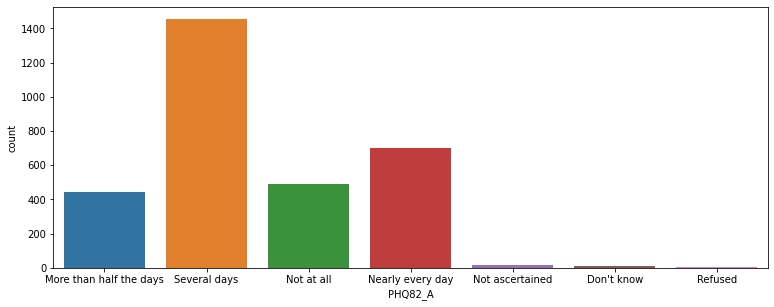

In [15]:
labels_ntostr = {1: 'Not at all', 2: 'Several days', 3: 'More than half the days', 4: 'Nearly every day', 7: 'Refused', 
          8: 'Not ascertained', 9: "Don't know"}
depressed_core.PHQ82_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ82_A', data=depressed_core)

Again most felt down several days.  

PHQ83_A indicates how often in the past two weeks people have been bothered by trouble falling asleep, trouble staying aslepp, or sleeping too much.

<AxesSubplot:xlabel='PHQ83_A', ylabel='count'>

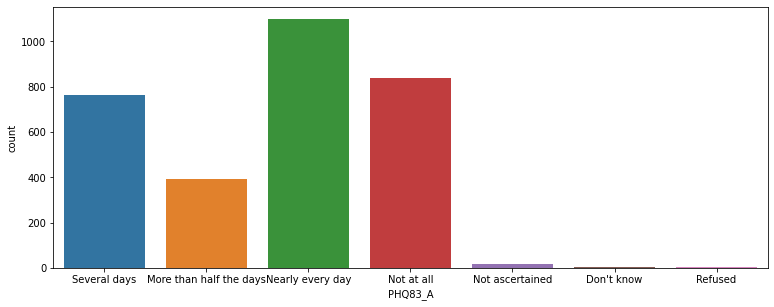

In [16]:
depressed_core.PHQ83_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ83_A', data=depressed_core)

In this case the majority of those with depression have been feeling bothered by trouble with sleep nearly every day

PHQ84_A records responses to the question on over the past two weeks how often have you been bothered by feeling tired or having little energy.

<AxesSubplot:xlabel='PHQ84_A', ylabel='count'>

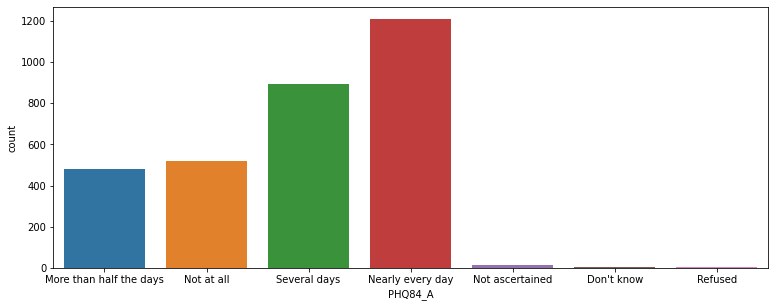

In [17]:
depressed_core.PHQ84_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ84_A', data=depressed_core)


Notice most have trouble with energy levels nearly every day.


PHQ85_A reports how many times in the past two weeks have people been bothered by a poor appetite or overeating.

<AxesSubplot:xlabel='PHQ85_A', ylabel='count'>

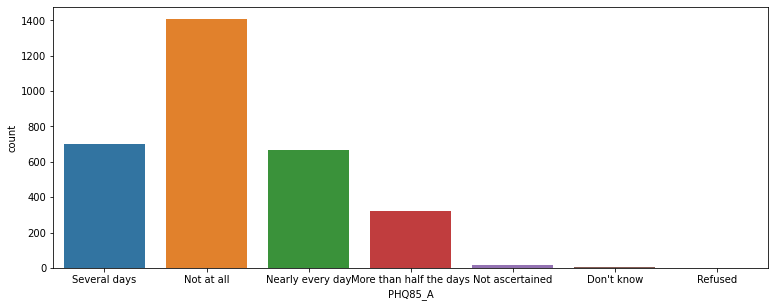

In [18]:
depressed_core.PHQ85_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ85_A', data=depressed_core)

The majority were not at all bothered by over or under eating.

PHQ86_A reports how many times over the past two weeks, people have been bothered by feeling bad about themselves.

<AxesSubplot:xlabel='PHQ86_A', ylabel='count'>

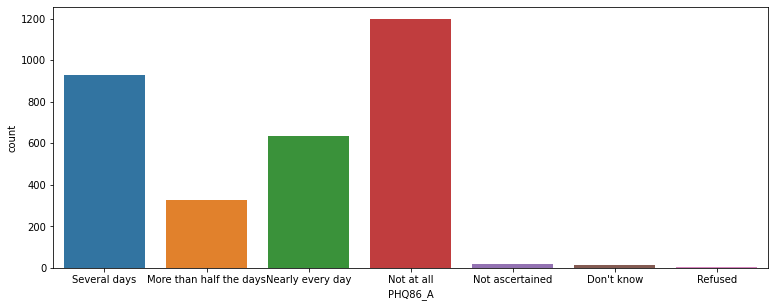

In [19]:
depressed_core.PHQ86_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ86_A', data=depressed_core)

As can be seen there is a split between several days or not at all.

PHQ87_A reports how many times over the past few weeks people have been bothered by trouble concentrating

<AxesSubplot:xlabel='PHQ87_A', ylabel='count'>

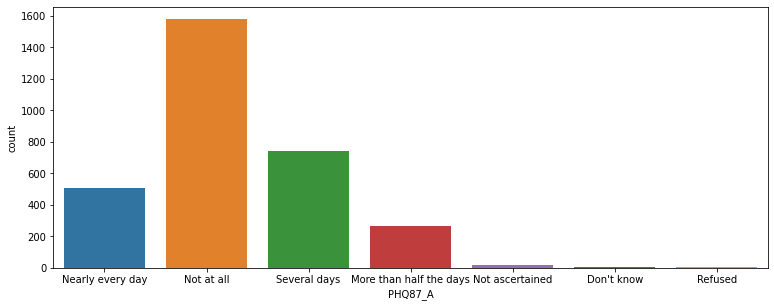

In [20]:
depressed_core.PHQ87_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ87_A', data=depressed_core)

Most were not bothered by trouble concentrating

PHQ88_A asks how often in the past few weeks people were bothered by moving or speaking slow or fast.

<AxesSubplot:xlabel='PHQ88_A', ylabel='count'>

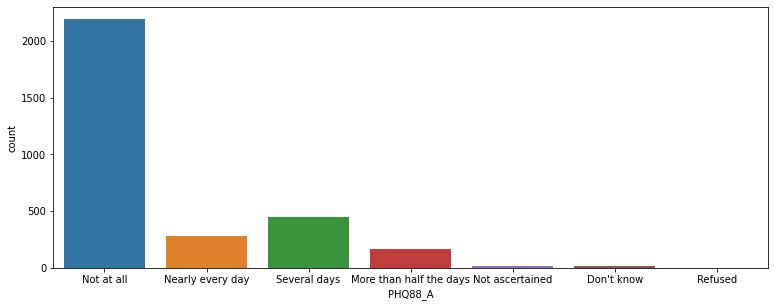

In [21]:
depressed_core.PHQ88_A.replace(labels_ntostr, inplace=True)
plt.figure(figsize=(12.8, 4.8))
sns.countplot(x='PHQ88_A', data=depressed_core)

The clear majority is not at all

In [22]:
depressed_core.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 4 to 31990
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DEPEV_A     3118 non-null   object
 1   DEPFREQ_A   3118 non-null   object
 2   DEPMED_A    3118 non-null   object
 3   DEPLEVEL_A  3118 non-null   object
 4   PHQ81_A     3118 non-null   object
 5   PHQ82_A     3118 non-null   object
 6   PHQ83_A     3118 non-null   object
 7   PHQ84_A     3118 non-null   object
 8   PHQ85_A     3118 non-null   object
 9   PHQ86_A     3118 non-null   object
 10  PHQ87_A     3118 non-null   object
 11  PHQ88_A     3118 non-null   object
dtypes: object(12)
memory usage: 381.2+ KB


#  Visualizing the data using PCA and UMAP

In [25]:
df_depressed_core = pd.get_dummies(depressed_core)


In [27]:
X = df_depressed_core.values

Text(0.5, 1.0, 'UMAP')

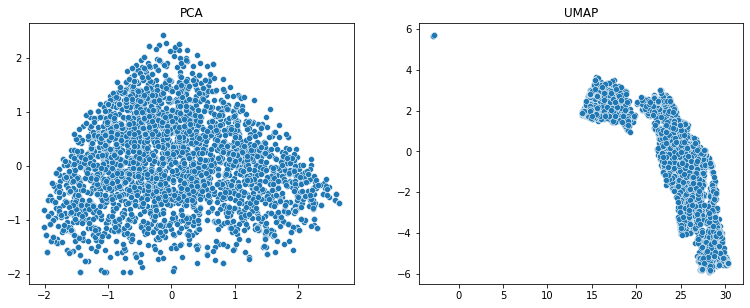

In [28]:
pca=PCA(n_components=2)
X_2d_pca = pca.fit_transform(X)
umap = UMAP(n_components=2)
X_2d_umap = umap.fit_transform(X)
fig, axs = plt.subplots(1,2,figsize=(12.8,4.8))
sns.scatterplot(x=X_2d_pca[:,0],y=X_2d_pca[:,1], ax=axs[0])
axs[0].set_title('PCA')
sns.scatterplot(x=X_2d_umap[:,0],y=X_2d_umap[:,1], ax=axs[1])
axs[1].set_title('UMAP')

It looks like there isn't much clustering.   

# Kmeans

<AxesSubplot:>

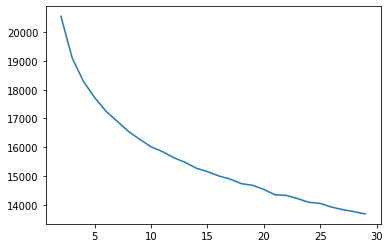

In [29]:
inertia_values = []
for n in range(2,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia_values.append((n,kmeans.inertia_))
results = list(zip(*inertia_values))

sns.lineplot(x=results[0],y=results[1])

Unfortunately there is no apparent elbow.  Maybe around 20.  I'm going to check silhouette scores for values from 5 to 25

In [41]:
for n in range(5,26):
    kmeans = KMeans(n_clusters=n)
    preds = kmeans.fit_predict(X)
    print("The silhouette score for {} clusters is {}".format(n,silhouette_score(X,preds)))

The silhouette score for 5 clusters is 0.08741044862456168
The silhouette score for 6 clusters is 0.08317226364871086
The silhouette score for 7 clusters is 0.08357658166144763
The silhouette score for 8 clusters is 0.08092026410644683
The silhouette score for 9 clusters is 0.07926089284184713
The silhouette score for 10 clusters is 0.06841417056898917
The silhouette score for 11 clusters is 0.07398401228726123
The silhouette score for 12 clusters is 0.06862987526548164
The silhouette score for 13 clusters is 0.0658334683012878
The silhouette score for 14 clusters is 0.06547724025080834
The silhouette score for 15 clusters is 0.06228446087700573
The silhouette score for 16 clusters is 0.05991240313020397
The silhouette score for 17 clusters is 0.06273178186571858
The silhouette score for 18 clusters is 0.06582730828797877
The silhouette score for 19 clusters is 0.06670360744962099
The silhouette score for 20 clusters is 0.05905486544070722
The silhouette score for 21 clusters is 0.0599

All seems low, the silhouette score keeps droping.  K means may not be the best clustering algorithm or more information is needed.  I'm going to see what DBSCAN picks

# DBSCAN

In [31]:
db = DBSCAN()
preds = db.fit_predict(X)
print('The number of clusters selected by DBSCAN is {}'.format(preds.max()))

The number of clusters selected by DBSCAN is 15


In [32]:
print("The silhouette score for DBSCAN is {}".format(silhouette_score(X[preds!=-1],preds[preds!=-1])))

The silhouette score for DBSCAN is 1.0


The silhouette score for those that are not outliers is perfect.

In [34]:
np.unique(preds, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([2961,   31,    8,   21,    5,    6,    6,   14,    7,    5,    6,
           5,   18,    5,   10,    5,    5], dtype=int64))

The majority are outliers, but we do see small groups of clusters.  I wil want to take a look at those 15 clusters and see what they have in common.

In [36]:
depressed_core['dbscan_clusters'] = preds

In [37]:
clusters = [0]*15
for i in range(15):
    clusters[i] = depressed_core[depressed_core.dbscan_clusters==i]

In [39]:
clusters[0].head()

,DEPEV_A,DEPFREQ_A,DEPMED_A,DEPLEVEL_A,PHQ81_A,PHQ82_A,PHQ83_A,PHQ84_A,PHQ85_A,PHQ86_A,PHQ87_A,PHQ88_A,dbscan_clusters
141,Yes,Daily,Yes,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,0
1931,Yes,Daily,Yes,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,0
2034,Yes,Daily,Yes,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,0
3107,Yes,Daily,Yes,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,0
3443,Yes,Daily,Yes,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,0


Cluster 0 appears to be those on medication that feel depression daily but still suffer from all effects nearly every day.  I would label these as those with sever depression for which medication is not working.

In [42]:
clusters[1].head()

,DEPEV_A,DEPFREQ_A,DEPMED_A,DEPLEVEL_A,PHQ81_A,PHQ82_A,PHQ83_A,PHQ84_A,PHQ85_A,PHQ86_A,PHQ87_A,PHQ88_A,dbscan_clusters
321,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1
3894,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1
10033,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1
12706,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1
23310,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1


Cluster 1 are those that are not on medication but suffer a lot from depression and feel every effect nearly every day.  This cluster contains only 8 people.  

I will want to take a look at what else these have in common besides this, using the original data and standard deviation

In [46]:
# remember to use loc to get by index, example below
clusters[1].loc[[321,3894]]

,DEPEV_A,DEPFREQ_A,DEPMED_A,DEPLEVEL_A,PHQ81_A,PHQ82_A,PHQ83_A,PHQ84_A,PHQ85_A,PHQ86_A,PHQ87_A,PHQ88_A,dbscan_clusters
321,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1
3894,Yes,Daily,No,A lot,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,1
